In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.metrics import classification_report
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

## Loading Datasets

In [3]:
df = pd.read_csv('cancer-patient_datasets_Change.csv')
#df.head()
#df.describe()

## Specify Target

In [4]:
target = df['Level']

### Split Datasets

In [5]:
seed = 7
train_data, test_data = train_test_split(df, test_size=0.3, 
random_state=seed, stratify=target)

## Separate the independent and target variables

In [6]:
# separate the independent and target variables from training data
train_x = train_data.drop(columns=['index','Patient Id','Level'],axis=1)
train_y = train_data['Level']
# separate the independent and target variables from test data
test_x = test_data.drop(columns=['index','Patient Id','Level'],axis=1)
test_y = test_data['Level']

## Normalization 

In [7]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#train_x = scaler.fit_transform(train_x)
#test_x = scaler.fit_transform(test_x)
#print(train_x)
#print(test_x)

## Standarization

In [8]:
"""
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
train_x = scaling.fit_transform(train_x)
test_x = scaling.fit_transform(test_x)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nscaling = StandardScaler()\ntrain_x = scaling.fit_transform(train_x)\ntest_x = scaling.fit_transform(test_x)\n'

## Build Random Forrest Model

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
rf_classifier.fit(train_x, train_y)

# Make predictions on the test set
rf_pred_train = rf_classifier.predict(train_x)
rf_pred_test = rf_classifier.predict(test_x)
# Evaluate the accuracy of the model
#accuracy = accuracy_score(test_y, y_pred)
#print(f"Accuracy: {accuracy:.2f}")

### Build Decesion Tree Model 

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt_classifier.fit(train_x, train_y)
dt_pred_train = dt_classifier.predict(train_x)
dt_pred_test = dt_classifier.predict(test_x)

### Importances Features of Random Forrest

Feature ranking:
1. Feature 4 (Dust Allergy): 0.10491506933380756
2. Feature 9 (Obesity): 0.09986709230928557
3. Feature 14 (Fatigue): 0.08955135776462748
4. Feature 13 (Coughing of Blood): 0.08611821114201806
5. Feature 5 (OccuPational Hazards): 0.07403336320546414
6. Feature 3 (Alcohol use): 0.07393931824790946
7. Feature 18 (Swal0ing Difficulty): 0.06449439424178507
8. Feature 17 (Wheezing): 0.055667372053385726
9. Feature 16 (Shortness of Breath): 0.04670314929367123
10. Feature 22 (Snoring): 0.044495956308013465
11. Feature 20 (Frequent Cold): 0.0402700284359111
12. Feature 6 (Genetic Risk): 0.03578224978677818
13. Feature 15 (Weight Loss): 0.03324383599960726
14. Feature 19 (Clubbing of Finger Nails): 0.032403471617952026
15. Feature 7 (chronic Lung Disease): 0.023455266669950032
16. Feature 2 (Air Pollution): 0.021825779116205427
17. Feature 12 (Chest Pain): 0.01754137636452373
18. Feature 11 (Passive Smoker): 0.016640167201724447
19. Feature 21 (Dry Cough): 0.014901208449008888

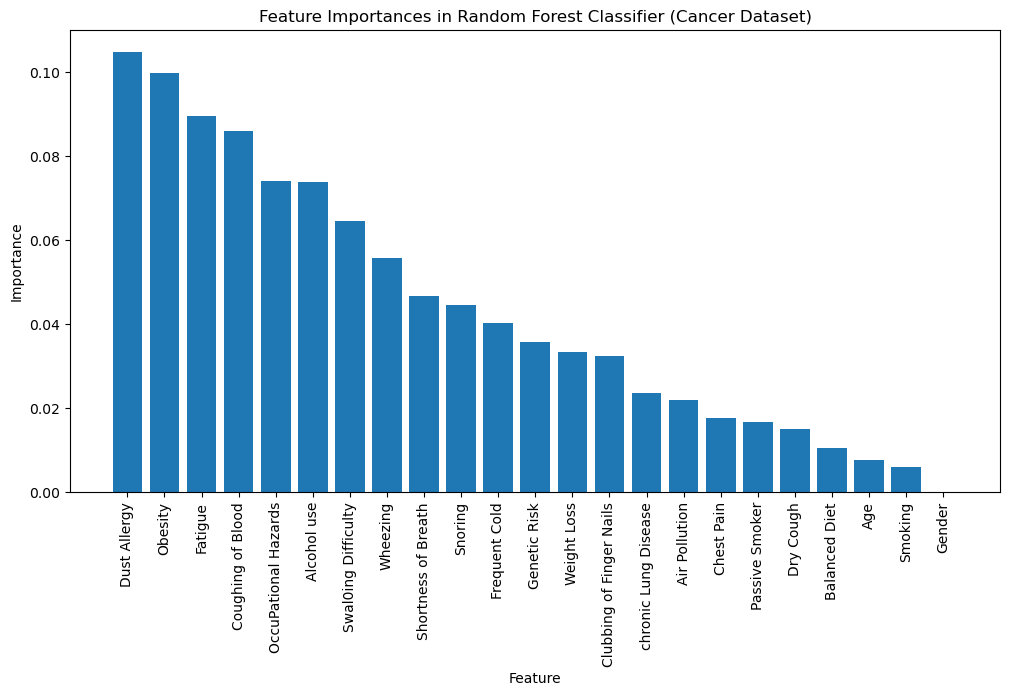

In [19]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort the features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, feature_index in enumerate(sorted_indices):
    print(f"{i + 1}. Feature {feature_index} ({train_x.columns[feature_index]}): {feature_importances[feature_index]}")

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(train_x.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(train_x.shape[1]), np.array(train_x.columns)[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Classifier (Cancer Dataset)")
plt.show()


### Compare Decesion Tree and Random Forrest

### Compare Both Model(Using Accuracy and F1Score)

In [15]:
compare = pd.DataFrame({'Model': ['Decision tree',
                                  'Random Forrest'], 
                        'Train Accuracy': [accuracy_score(train_y, dt_pred_train),
                                     accuracy_score(train_y,rf_pred_train)],                       
                       'Test Accuracy': [accuracy_score(test_y, dt_pred_test),
                                     accuracy_score(test_y,rf_pred_test)],
                       'F1_Score': [f1_score(test_y,dt_pred_test),
                                     f1_score(test_y,rf_pred_test)],
                       })
compare.head()

,Model,Train Accuracy,Test Accuracy,F1_Score
0,Decision tree,1.0,1.0,1.0
1,Random Forrest,1.0,1.0,1.0


### Importance Features of Both Model(Random Forrest and Decesion Tree)

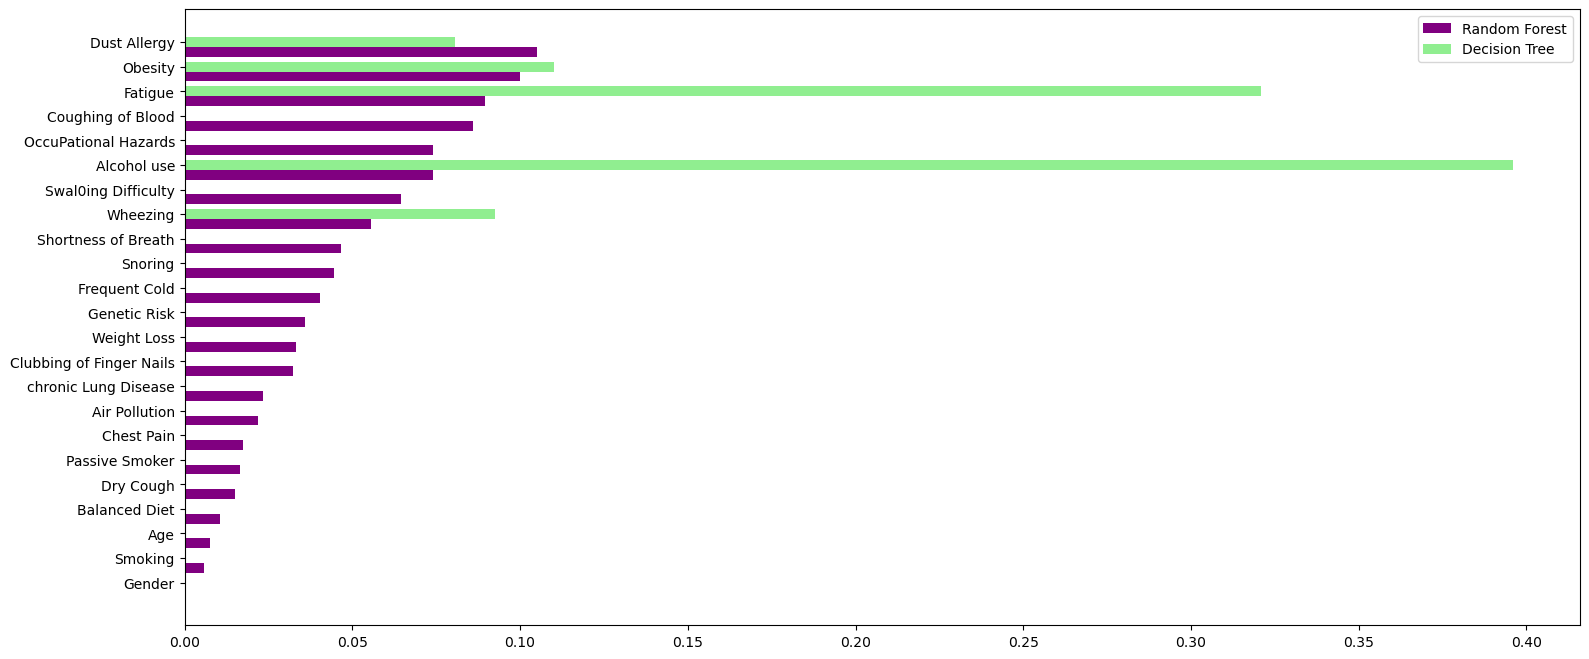

In [16]:
feature_importance=pd.DataFrame({
    'rf_classifier':rf_classifier.feature_importances_,
    'dt_classifier':dt_classifier.feature_importances_
},index=df.drop(columns=['index','Patient Id','Level']).columns)
feature_importance.sort_values(by='rf_classifier',ascending=True,inplace=True)
#Arrange Index
index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rf_classifier'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt_classifier'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()